## Calculate PSNR
Used to calculate PSNR for supervised denoising method.

In [1]:
import argparse
import os
import sys
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch.distributions import Poisson
from skimage.metrics import peak_signal_noise_ratio
from PIL import Image

%load_ext autoreload
%autoreload 2

In [10]:
def plot_img(im,grayscale=True,vmin=None,vmax=None):
    '''Plots image in gray or color. It doesn't consider vmin and vmax though.'''
    if im.min() < 0:
        im = im*0.5 + 0.5
    if grayscale:
        if vmin:
            plt.imshow(im.detach().to('cpu')[0,0],cmap='gray',vmin=vmin,vmax=vmax)
        else:
            plt.imshow(im.detach().to('cpu')[0,0],cmap='gray')
    else:
        if vmin:
            plt.imshow(im[0,:,:,:].detach().to('cpu').permute(1,2,0),vmin=vmin,vmax=vmax)
        else:
            plt.imshow(im[0,:,:,:].detach().to('cpu').permute(1,2,0))

In [6]:
save_dir = '../../microscope_output/NEW_comparison test/'
filename = "denoise_images.dat"
if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
else:
    map_location='cpu'
    
im_full_list = torch.load(save_dir+'sup_denoised_0.pt', map_location='cpu')
# with open(save_dir+filename, "rb") as f:
#     im_full_list = pickle.load(f)
# im_full_list = torch.load(save_dir+filename,map_location=torch.device('cpu'))

In [8]:
im_list = []
for i in np.arange(7):
    im_tmp = torch.load(save_dir+'sup_denoised_'+str(i)+'.pt', map_location='cpu')
    im_list.append(im_tmp)

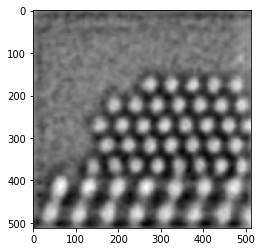

In [16]:
plot_img(im_list[1],True,0,1)

In [29]:
# PSNR
print("   PSNR  \tMSE")
for i in np.arange(1,7):
    psnr = peak_signal_noise_ratio(im_list[0].detach().to('cpu').numpy(),im_list[i].detach().to('cpu').numpy(),data_range=2)
    mse = F.mse_loss(im_list[0].detach().to('cpu'),im_list[i].detach().to('cpu'),reduction='sum')
    print("{}: {:2.4f}\t{:2.4f}".format(i,psnr,mse))
    

   PSNR  	MSE
1: 34.3150	388.2355
2: 29.7503	1110.6387
3: 29.5105	1173.6920
4: 36.9148	213.3657
5: 32.3048	616.7690
6: 32.5790	579.0231
